In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MNIST/fashion-mnist_train.csv', dtype=int) # read train data

In [3]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int32(785)
memory usage: 179.7 MB


In [5]:
df['label'].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [6]:
from sklearn.metrics import confusion_matrix,classification_report , accuracy_score

In [7]:
h_0 = np.full(60000,1)
print(h_0)

[1 1 1 ... 1 1 1]


In [8]:
print(classification_report(df.label,h_0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6000
           1       0.10      1.00      0.18      6000
           2       0.00      0.00      0.00      6000
           3       0.00      0.00      0.00      6000
           4       0.00      0.00      0.00      6000
           5       0.00      0.00      0.00      6000
           6       0.00      0.00      0.00      6000
           7       0.00      0.00      0.00      6000
           8       0.00      0.00      0.00      6000
           9       0.00      0.00      0.00      6000

    accuracy                           0.10     60000
   macro avg       0.01      0.10      0.02     60000
weighted avg       0.01      0.10      0.02     60000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


בדיקת מודלים

In [9]:
X = df.drop("label",axis = 1)
y = df.label

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=16, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [12]:
fi = rnd_clf.feature_importances_
pi = np.reshape(fi,(28,28))

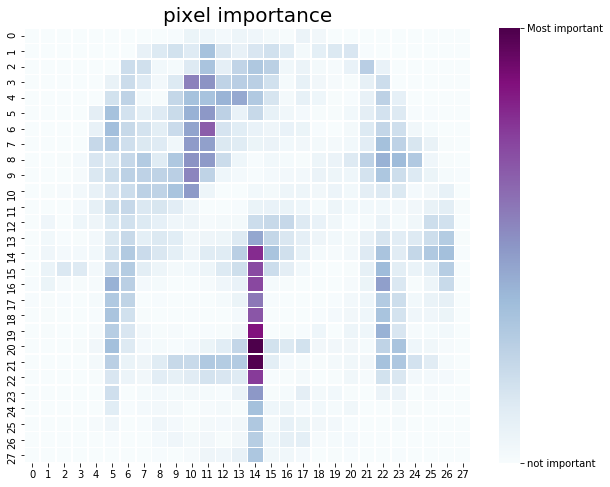

In [13]:
plt.figure(figsize= (10,8))
ax = sns.heatmap(pi,cmap='BuPu',linewidths=.5)
cbar = ax.collections[0].colorbar
cbar.set_ticks([0,max(fi)])
cbar.set_ticklabels(['not important','Most important'])
plt.title('pixel importance',size = 20)
plt.show()

In [14]:
from sklearn.decomposition import PCA
pca= PCA(n_components=0.95)
x_reduced = pca.fit_transform(X)

In [15]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.5, random_state=0)

model = GaussianNB()

model.fit(X_train, y_train).predict(X_test)
print(model)
expected = y_train
predicted = model.predict(X_train)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      3056
           1       0.94      0.88      0.91      2957
           2       0.73      0.67      0.70      3009
           3       0.79      0.76      0.78      2960
           4       0.74      0.68      0.71      3060
           5       0.80      0.73      0.76      3022
           6       0.56      0.47      0.51      2960
           7       0.74      0.85      0.79      3019
           8       0.61      0.87      0.72      2985
           9       0.93      0.86      0.89      2972

    accuracy                           0.75     30000
   macro avg       0.76      0.75      0.75     30000
weighted avg       0.76      0.75      0.75     30000

[[2268   14   49  170   13   32  178    0  332    0]
 [   9 2616   24  151    5   20   34    0   98    0]
 [  81    0 2009   16  345   30  247    1  280    0]
 [ 130  131   30 2260   85   33  119 

In [16]:
def logRegModel(X, y):
    # Split the data (X, Y)
    from sklearn import metrics
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    # Create and train model
    logmodel = LogisticRegression()
    logmodel.fit(X_train, y_train)
    predictions = logmodel.predict(X_test)

    # Evaluate the model
    cfm = metrics.confusion_matrix(y_test, predictions)
    sns.heatmap(cfm, annot=True)
    print(classification_report(y_test, predictions))
    
    
def SVMModel(x, y):
    # Split the data (X, Y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)
    
    # Create and train model
    from sklearn.svm import SVC
    svclassifier = SVC(kernel='linear')
    svclassifier.fit(X_train, y_train)
    y_pred = svclassifier.predict(X_test)
    
    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    cfm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cfm, annot=True)
    print(classification_report(y_test,y_pred))
    
def knn(x, y):
    # Split the data (X, Y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    
    # Create and train model
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    cfm = confusion_matrix(y_test,y_pred)
    sns.heatmap(cfm, annot=True)
    print(classification_report(y_test, y_pred))

def tree(x,y):
    # Split the data (X, Y)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
    
    # Create and train model
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Evaluate the model
    from sklearn.metrics import classification_report, confusion_matrix
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [17]:
tree(x_reduced,y)

[[ 867    6   18   93   28    2  198    0   18    2]
 [   8 1158    7   44   12    1   10    0    0    0]
 [  26   10  723   26  186    2  156    0   29    1]
 [  73   37   15  927   55    2   60    0   20    1]
 [  19    7  181   60  727    5  144    0   25    1]
 [   3    3    3    2    3 1014    4  106   25   56]
 [ 179   11  151   53  145    2  611    1   31    0]
 [   2    0    0    0    0   98    0 1059    6   88]
 [  19    3   21   20   17   26   33    8 1032    6]
 [   1    0    0    1    1   56    0   82    7 1021]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      1232
           1       0.94      0.93      0.94      1240
           2       0.65      0.62      0.63      1159
           3       0.76      0.78      0.77      1190
           4       0.62      0.62      0.62      1169
           5       0.84      0.83      0.84      1219
           6       0.50      0.52      0.51      1184
           7       0.84      0.85   

In [ ]:
SVMModel(x_reduced, y)

In [ ]:
logRegModel(x_reduced,y)

In [ ]:
df['label'].plot.pie()